---
# 📁 Hyun's Code collection (Regression) 
---

### <h3 align="right">🥇 Authored by <strong>Hyun</strong></h3>

# ✏️ Linear Regression

- 선형회귀! 가장 기본 모델이다.
- train data로 모델을 만들고, test data로 성능을 평가
- Normal Equation으로 최적의 parameter를 계산한다!  
$\hat\theta = (X^T*X)^{-1}*X^T*y$
- $\hat\theta$: 비용 함수를 최소화하는 $\theta$ 값
- y는 $y^{(1)}$부터 $y^{(m)}$까지 포함하는 타깃 벡터

## 🔎 Basic Methods
- **linear_model .LinearRegression ( fit_intercept = True , normalisze = True , copy_X = True , n_jobs = )**: 모델 만들어주기 
  - fit_intercept: 상수항을 넣을지 말지
  - normalize: 앞에서 scaling 해줬으면 굳이 또 안해줘도 됨
  - n_jobs: CPU를 몇 개 쓸건지 지정할 수 있다
 - **linear_model .LinearRegression . fit ( X_train , y_train )**: fit 시켜주기
   
   **.coef_**: 계수를 반환   

   **.intercept_**: y 절편을 반환
   
   **.predict ( X_test )**: : 예측하기
- **mean_squared_error ( y_true , y_pred )**: MSE 추출하기
- statsmodels를 이용해서 regression을 할 수도 있음

## 📔 Examples

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [ ]:
# statsmodels를 이용한 regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

In [ ]:
# OLS regression using statsmodels (how to extract p-value, r-square)
result_extract_value = {}
for category in tqdm(dict_data):
    dict_model = {'rsq': {}, 'pval': {}}
    for model in list_models:
        # create dataframe
        df = dict_data[category][model]
        df = count_records(dummify(df))
        
        # train OLS model
        x = df.iloc[:, 1:]
        y = df['records']
        
        x = sm.add_constant(x)
        est = sm.OLS(y, x)
        est = est.fit()
        
        # get p-values and r-square
        dict_modeltemp = est.pvalues.to_dict()
        del dict_modeltemp['const']
        del dict_modeltemp['YM']
        dict_model['rsq'].update({model[1]: est.rsquared})
        dict_model['pval'].update(dict_modeltemp) 
    result_extract_value[category] = dict_model

In [ ]:
# Normal equation 예시1
from sklearn.linear_model import LinearRegression
lr_ne = LinearRegression(fit_intercept = True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

lr_ne.fit(X_train, y_train)

y_hat = lr_ne.predict(X_test)
y_true = y_test

mse = sklearn.metris.mean_squared_error(y_hat, y_true)

In [ ]:
import numpy as np
theta = np.random.randn(2,1)
print(theta)

[[0.27860707]
 [2.09108475]]


# ✏️ Gradient Descent (Batch Gradient Descent) 

- 한 점에서 내려가면서 기존 값에서 계속 업데이트 해주면서 새로운 값을 적용해 최소값을 찾아내는 것
- Gradient descent를 활용할 때는 반드시 Scaling을 해야 함. 안 그러면 수렴하는 데 오래 걸린다.
- feature 개수에 민감하지 않아 많은 feature가 있을 때는 linear regression보다 gradient descent가 더 빠르다.
- 랜덤으로 주어진 gradient에 대해서 비용함수(보통 MSE)의 gradient vector를 구하고!  <br>
<br>
 $MSE = \frac{1}{N}\sum_{(i=1)}^N(\theta^T*x^{(i)}-y_i)^2$ <br>
 <br>
 cost function의 편도함수 : $\frac{\sigma}{\sigma\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^T*x^{(i)}-y^{(i)})x^{(i)}_j$ <br>
 <br>
 cost function의 gradient vector : $\Delta_\theta MSE(\theta) = \frac{2}{m}(\theta*X-y)*X^T$<br>
 <br>
- Learning rate를 적용하여 gradient를 계속 업데이트 해주면서 최적의 parameter를 찾는다! <br>
 <br>
 $\theta^{(next..step)} = \theta - \eta*\Delta_\theta MSE(\theta)$
- 단점: 매 step에서 전체 train set을 사용해 gradient를 계산함. train set이 커지면 매우 느려짐

## 🔎 Basic Methods

- **linear_model .LinearRegressionGD ( eta0 = , epochs = , batch-size = , shuffle = )**: gradient descent 만들기
  - eta0: learning rate
- Ex)

  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 1 , shuffle = False)**: Gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = len(X) , shuffle = False)**: Batch gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 1 , shuffle = True)**: Stochasic gradient descent
  
  **linear_model .LinearRegressionGD ( eta0 = 0.001 , epochs = 10000 , batch-size = 100 , shuffle = True)**: Mini-batch stochasic gradient descent

## 📔 Examples

In [ ]:
# Gradient Descent를 이용한 Linear Regression
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)   # 해당 parameter에서의 gradient vector를 구한다.
    theta = theta - eta * gradients

# ✏️ Stochastic Gradient Descent

- Gradient descent와는 다르게 매 step에서 딱 한 개의 sample을 무작위로 선택해 gradient를 계산 -> 훨씬 빠르다
- 단점
 1. 무작위이기 때문에 Gradient descent보다 훨씬 불안정적. 어떤 샘플은 한 epoch에서 여러 번 선택되고 어떤 샘플은 전혀 선택되지 못할 수도
   - 해결: 모든 샘플 사용하려면 train set를 shuffle하고 차례대로 하나씩 선택 후 다음 epoch에서 다시 섞는 식을 사용 -> Scki-learn SGD에서 사용하는 방법!
 2. 즉, cost function이 최솟값에 매우 근접하지만 안착하지는 못한다.  
   - 해결: learning rate를 점진적으로 감소하면 된다.
- 장점: cost function이 매끈하지 않고 불규칙할 경우 지역 최솟값을 건너뛸 수 있도록 도와줘서 전역 최솟값을 찾을 가능성이 높아진다.
- 전체 데이터가 1억건, 10억건 되는 상황에서 전체를 고려해서 한 번씩 weight를 수정하는 것은 시간이 오래 걸림! 이러한 상황에서 1억건의 데이터를 1천만 건씩 나눠서 학습을 진행하자는 것이 Stochastic gradient descent.
- 기존보다 더 빠르게 학습함. 
- Stochastic gradient descent는 x의 값을 돌아가면서 gradient를 구해서 지역 최적화에 빠지는 것을 최소화 한다.

## 🔎 Basic Methods

- **linear_model .SGDRegressor ( n_iter = , loss = ’squared_loss ’, penalty = ’l2 ’,  alpha = 0.0001 , l1_ratio = 0.15 , fit_intercept = True , max_iter = 1000 , tol = 0.001 , shuffle = True , verbose = 0 , epsilon = 0.1 , random_state = None , learning_rate = ’optimal ’ , eta0 = 0.01 , power_t = 0.25 , early_stopping = False , validation_fraction = 0.1 , n_iter_no_change = 5 , warm_start = False , average = False )**: Stochastic gradient descent
  - loss function: squared loss를 기본적으로 사용하면 된다.
  - penalty: regularization 방법. L1, L2, elastic net
  - alpha: L2 앞에 람다 값을 얼마로 설정해줄까. 이 값이 크면 클수록 regularization이 많이 되기 때문에 학습 데이터 값이 줄어든다.
  - max_iter: number of epoch. epoch을 몇 번 돌껀가
  - tol: 멈추는 기준
  - shutffle: SGD이기 때문에 섞는다. False로 하면 Batch gradient descent가 되는 것
  - learning_rate: 돌아갈 때마다 일정량 줄어들게 되는 것. 줄어드는 전략은 3개의 전략! constant, optimal, invscaling
  - eta0: learning rate을 지정. 학습속도를 빠르게 하려면 eta를 올려주면 됨. 
  - warm_start: 잘 안 쓰기는 하는데 weight의 초기값을 지정해줄 수 있다. 초기값을 기반으로 예측!
  - penalty: 규제방식을 설정. "l2"로 주면 비용 함수에 가중치 벡터의 $\iota_2$ norm의 제곱을 2로 나눈 규제항을 추가, 즉 Ridge가 된다. "l1"하면 Lasso가 됨

## 📔 Examples

In [ ]:
# numpy, pandas, matplotlib으로 구현한 SGD
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터 learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # 책에는 빠짐
            y_predict = X_new_b.dot(theta)           # 책에는 빠짐
            style = "b-" if i > 0 else "r--"         # 책에는 빠짐
            plt.plot(X_new, y_predict, style)        # 책에는 빠짐
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # 책에는 빠짐

plt.plot(X, y, "b.")                                 # 책에는 빠짐
plt.xlabel("$x_1$", fontsize=18)                     # 책에는 빠짐
plt.ylabel("$y$", rotation=0, fontsize=18)           # 책에는 빠짐
plt.axis([0, 2, 0, 15])                              # 책에는 빠짐
save_fig("sgd_plot")                                 # 책에는 빠짐
plt.show()                                           # 책에는 빠짐

In [ ]:
# Stochastic gradient descent 예시1
from sklearn.linear_model import SGDRegressor
lr_SGD = SGDRegressor()

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)
X_scaled = std_scaler.transform(X)

from sklearn.mode_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

lr_SGD.fit(X_train, y_train)

y_hat = lr_SGD.predict(X_test)
y_true = y_test

mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))

'''
rmse값이 엄청나게 커졌다는 것은 학습이 잘 안 되었다는 뜻!
learning rate이 너무 크다거나 충분히 돌지 못했을 때 발생
'''

# scaled된 data로 돌리면
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.33, random_state=42)

lr_SGD.fit(X_train, y_train)

y_hat = lr_SGD.predict(X_test)
y_true = y_test

mse = sklearn.metrics.mean_squared_error(y_hat, y_true)
rmse = np.sqrt((((y_hat - y_true)**2).sum() / len(y_true)))
# rmse값이 안정적으로 나오게 된다. 즉 SGD regression을 할 때는 반드시 scaling을 해야 한다!

# ✏️ Mini-batch Gradient Descent

- 전체 훈련 세트 x, 하나의 샘플 x
- Mini-batch라 부르는 임의의 작은 샘플 세트에 대해 Gradient를 계산
- 장점
  - GPU를 사용해 성능을 향상시킬 수 있음
  - SGD보다 덜 불규칙하게 움직임

# ✏️ Polynomial Regression

- 1차식이 아닌 다항식! 비선형 관계 예측에 용이!

## 🔎 Basic Methods


- **PolynomialFeatures ( degree = , include_bias=False, interaction_only = False)**: polynomial feature 만들어주기. degree가 2이면 제곱항까지 만들어줄 것을 의미
  - interaction_only: False로 지정하면 거듭제곱이 포함된 항은 모두 제외됨. 즉 a, b, ab만 남음
- **PolynomialFeatures .fit_transform ( 데이터 )**: polynomial feature로 바꿔주기
- **PolonomialFeatures .get_feature_names ( )**: 만들어진 특성의 차수를 쉽게 확인가능

## 📔 Examples

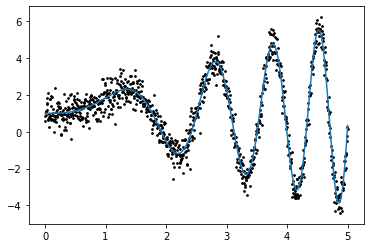

In [ ]:
# 예시1 
import numpy as np
import matplotlib.pyplot as plt

def f(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1
    return (x,y)

def sample(size):
    x = np.linspace(0, 5, size)
    y = x * np.sin(x ** 2) + 1 + np.random.randn(x.size)*0.5
    return (x,y)
  
  

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
X, y = sample(1000)
plt.scatter(X, y, s=3, c="black")
plt.show()

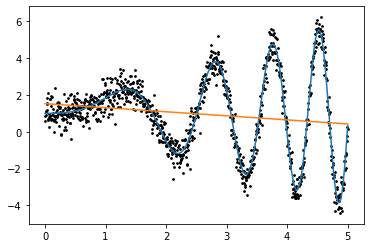

In [ ]:
# 예시1 
X = X.reshape(-1,1)
y = y.reshape(-1,1)
X.shape, y.shape

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X).flatten())
plt.show()

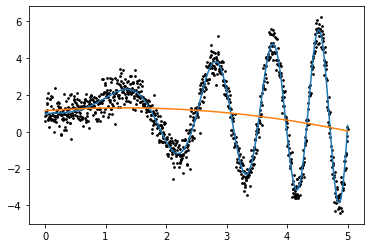

In [ ]:
# 예시1 
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
X_poly[:10]

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)

f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

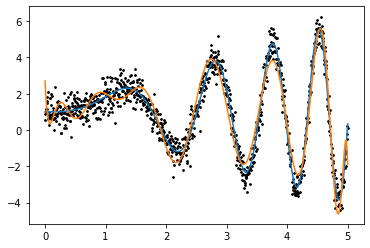

In [ ]:
# 예시1 
poly_features = PolynomialFeatures(degree=16)
X_poly = poly_features.fit_transform(X)
X_poly[:3]

lr = LinearRegression(fit_intercept=False)
lr.fit(X_poly,y)
f_x, f_y = f(1000)
plt.plot(f_x, f_y)
plt.scatter(X.flatten(), y.flatten(), s=3, c="black")
plt.plot(X.flatten(), lr.predict(X_poly).flatten())
plt.show()

In [ ]:
# 예시 2
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

X[0]    # 원래 값 1개만 반환
X_poly[0]    # 원래 값 & degree가 적용된 값을 반환

lin_reg = LinearRegression()      # 변환을 해주면 LinearRegression()에 적용할 수 있다.
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

# ✏️ Regularized linear models (Lasso)

- Regularization에서 L1 방법을 쓰는 것
- Parameter에 절대값을 취함으로써 정규화시킨다.
- Lasso의 중요한 특징: 덜 중요한 feature의 가중치를 완전히 제거하려고 함  
  자동으로 feature selection을 진행하고 희소 모델(sparse model)을 만든다.
- Lasso를 쓰면 feature selection이 가능하다.<br>
- Lasso의 cost function<br>
  <br>$J(\theta) = MSE(\theta) + \alpha\sum_{(i=1)}^n|\theta_i|$


## 🔎 Basic Methods

- **linear_model .Lasso ( alpha = 1.0, fit_intercept = True , normalize = False , precompute = False , copy_X = True , max_iter = 1000 , tol = 0.0001 , warm_start = False , positive = False , random_state = None , selection = ’cyclic ’)**: Lasso

## 📔 Examples

In [ ]:
# Lasso 예시
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

# ✏️ Regularized linear models (Ridge)

- Regularization에서 L2 방법을 쓰는 것
- 규제 있는 모델을 데이터를 Scale에 민감하기에 Scaling이 중요하다.
- 규제항에  $\alpha\sum_(i=1)^n\theta_i^2$을 추가
- 규제항은 훈련하는 동안에만 cost function에 추가하고 훈련이 끝나면 규제 없는 성능 지표로 평가
> Cost function<br><br>
 - $J(\theta) = MSE(\theta) + \alpha\frac{1}{2}\sum_{(i=1)}^n\theta_i^2$ <br>
 - $\alpha$는 모델을 얼마나 규제할지 조절!
 - $\alpha$가 0이면 선형 회귀, $\alpha$가 너무 크면 모든 가중치가 0에 가까워지고 수평선이 된다.


## 🔎 Basic Methods

- **linear_model.Ridge ( alpha = 1.0 , fit_intercept = True , normalize = False , copy_X = True , max_iter = None , tol = 0.001 , solver = ’auto ’, random_state = None )**: Ridge
  - solver: auto로 하면 데이터를 보고서 fitting을 할 때 어떤 알고리즘을(normal equation, SGD) 알아서 찾아준다.

## 📔 Examples

In [ ]:
# Ridge 예시
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

# ✏️ Elastic Net

- Ridge와 Lasso 규제항을 더해서 절충한 모델
- 혼합 비율 r = 0이면 Ridge, r = 1이면 Lasso이다.
- Elastic Net의 cost function<br>
<br>$J(\theta) = MSE(\theta) + ra\sum_{(i=1)}^n|\theta_i|+\frac{1-r}{2}\alpha\sum_{(i=1)}^n\theta_i^2$

> 그럼 언제 각 모델을 사용할까?
- 일반적으로 일반 Linear regression은 피하자
- Ridge가 기본
- 실제로 쓰이는 특성이 몇 개밖에 없으면 **Lasso, Elastic Net**
- Feature > row, Feature 몇 개가 강하게 연관되어 있으면 **Elastic Net**


## 🔎 Basic Methods

- **ElasticNet ( alpha = , l1_ratio = )** : 기본적인 Elastic Net

## 📔 Examples

In [ ]:
from sklearn.linear_model import ElasticNEt
elastic_net = ElasticNet(alpha=0.1, l1_ratio = 0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

# ✏️ Logistic Regression

- Sample이 특정 class에 속할 확률을 추정하는 데 사용하는 Regression
- 선형 회귀와 같이 input에 대한 parameter를 계산한 뒤, 결괏값의 Logistic을 출력
- Logistic Regression의 확률 추정 <br>
<br> $\hat{p} = h_\theta(x) = \sigma(\theta^T*x)$ <br>
- [Logistic Regression numpy 구현](https://towardsdatascience.com/logistic-regression-from-scratch-with-numpy-da4cc3121ece)

- Logistic function은 $\sigma(t) = \frac{1}{1+exp(-t)}$
<br>

#### Logistic function의 cost function (log loss)  
- $J(\theta) = -\frac{1}{m}\sum_{(i=1)}^m[y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)})]$ <br>
  <br>이 비용 함수의 최솟값을 계산하는 해는 없음.  
  GD를 사용해서 전역 최솟값을 찾아야 함<br>
<br>

#### Logistic function cost function의 편도함수 <br>
- $\frac{\sigma}{\sigma\theta_j}J(\theta) = \frac{1}{m}\sum_{(i=1)}^m(\sigma(\theta^T*x^{(i)})-y^{(i)})x_j^{(i)}$
<br>
- Logistic Regression의 cost function은 볼록함수여서 GD를 써도 지역 최솟값에 갇히지 않는다.
<br>

## 📔 Examples

In [ ]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
results = model.fit()
results.summary()

In [ ]:
  # Logistic regression 에시
# 먼저 데이터를 반응변인과 예측변인으로 분리하기
Y = (df['Status'] == 'Developed').astype(np.int) #'Developed'면 1, 아니면 0으로
X = df.drop('Status', axis=1)

# 예측변인과 반응변인을 train set과 test set으로 분리해 줍니다.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

from sklearn.linear_model import LogisticRegression

# 1. 먼저 모델을 만들어 줍니다.
logReg = LogisticRegression()

# 2. 모델 적합시킵니다.
logReg.fit(X_train, y_train)

# 3. 트레이닝셋과 테스트셋에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
print('Training R^2:', logReg.score(X_train, y_train))
print('Test R^2: ', logReg.score(X_test, y_test))

# 모델로부터 반응을 예측하고 accuracy, f1-score, confusion matrix를 구해봅시다.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
y_pred = logReg.predict(X_test)
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %.2f" %f1_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

# ✏️ Softmax Regression (Multinomial Logistic Regression)

- Logistic이 binary만 예측이 가능했다면 softmax는 여러 class를 예측할 수 있다.
- LogisticRegrssion(multi_class = "multinomial")로 설정하면 softmax regression 사용 가능


- 클래스 k에 대한 Softmax 점수<br>
<br> $s_k(x)=(\theta^{(k)})^T*x$   
<br> $\theta^{(k)}$: 클래스 만의 parameter vector
<br>

- 각 샘플 x에 대해 클래스 점수가 계산되면 softmax 함수에 통과시켜 클래스 k에 속할 확률을 추정 <br>
<br>$\hat{p_k} = \sigma(s(x))_K = \frac{exp(s_k(x))}{\sum_{j=1}^kexp(s_j(x))}$
<br> k: 클래스의 수
<br> s(x): 샘플 x에 대한 클래스 점수를 담고 있는 vector
<br> $\sigma(s(x))_k$: 샘플 x에 대한 클래스 점수에 대한 클래스 k에 속할 추정 확률
<br>

- Softmax regression 분류기의 예측 <br>
<br> $\hat{y} = argmax_k\sigma(s(x))_k = argmax_ks_k(x) = argmax_k((\sigma^{(k)})^T*x)$
<br>
<br>
- Cost function<br>
$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$
<br>
<br>
- Gradient 공식<br>
$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$
<br>
<br>
- $\hat{p}_k^{(i)} = 0$이면 $\log\left(\hat{p}_k^{(i)}\right)$를 계산할 수 없습니다. `nan` 값을 피하기 위해 $\log\left(\hat{p}_k^{(i)}\right)$에 아주 작은 값 $\epsilon$을 추가하겠습니다.

## 📔 Examples

In [ ]:
# softmax regression 예시1
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
save_fig("softmax_regression_contour_plot")
plt.show()

# predict
softmax_reg.predict([[5, 2]])

# predict probability
softmax_reg.predict_proba([[5, 2]])

## 📔 Examples (Softmax Regression with Learning Stopping)

data load하고 편항 추가

In [ ]:
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 넓이
y = iris["target"]
X_with_bias = np.c_[np.ones([len(X), 1]), X]

train test split

In [ ]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

one-hot encoding

In [ ]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [ ]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

softmax function  
$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [ ]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

input, output 개수 정의

In [ ]:
n_inputs = X_train.shape[1] # == 3 (특성 2와 편향)
n_outputs = len(np.unique(y_train))   # == 3 (3개의 붓꽃 클래스)

train

In [ ]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

parameter 확인

In [ ]:
Theta

예측과 정확도 확인

In [ ]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

L2 규제 추가해서 훈련

In [ ]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

Early stopping 추가

In [ ]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # 규제 하이퍼파라미터
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

모델의 예측을 그래프로 나타내기

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris-Virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris-Versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris-Setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("꽃잎 길이", fontsize=14)
plt.ylabel("꽃잎 폭", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

최종 정확도 측정

In [ ]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

# ✏️ SVM Regressor

- 제한된 마진 오류 안에서 도로 안에 가능한 한 많은 샘플이 들어가도록 학습하는 것.

## 🔎 Basic Methods

- **LinearSVR (max_iter = , random_state = )**: 기본 LinearSVR 모델

## 📔 Examples

In [ ]:
from sklearn.svm import LinearSVR

lin_svr = LinearSVR(max_iter=10000, random_state=42)
lin_svr.fit(X_train_scaled, y_train)

# 🎈 Algorithm Comparsion

| 알고리즘  |  Sample 多 |  Feature 多  |  Hyperparameter | 스케일 조정필요 | Sciki-learn |
|---|---|---|---|---|---|
| Normal equation | 빠름  | 느림 |  0 | No  | LinearRegression  |
| GD | 느림  |  빠름  |  2 |  Yes |  n/a |
| SGD  | 빠름  |  빠름  | >=2  |  Yes | SGDRegressor  |
| Mini-batch GD  | 빠름  | 빠름    |  >=2  |  Yes | n/a  |

# 🎈 Useful Tips

## Early Stopping

- 반복적인 학습 알고리즘(e.g GD)를 규제하는 방식
- Validation Error가 최솟값에 도달하면 바로 훈련을 중지시키는 것이 Early Stopping
- warm_start = True로 지정하면 fit ( ) 메소드가 호출될 때 이전 모델 parameter에서 훈련을 이어감

In [ ]:
from sklearn.base import clone
sgd_reg = SGDRegressor(max_iter=1, warm_start=True, penalty=None,
                       learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # 이어서 학습합니다
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## Learning Curve

- 학습곡선을 그려보면 얼마나 복잡한 모델을 사용할지 결정할 수 있다.
- Overfitting과 Underfitting을 알 수 있다.
- Training set의 RMSE: 초반에는 0에서 시작해서 점점 상승
  Validation set의 RMSE: 초반에는 높다가 점점 하락
1. Underfitting 판단
  - 꽤 높은 오차에서 두 곡선(Train set Error, Validation set Error)이 수평한 구간을 만든다.
  - 해결: 더 복잡한 모델을 사용 or 더 나은 Feature를 선택
2. Overfitting 판단
  - 두 곡선(Train set Error, Validation set Error) 사이에 공간이 크다.

In [ ]:
# Learning curve visualization
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# function
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="훈련")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="검증")
    plt.legend(loc="upper right", fontsize=14)   # 책에는 빠짐
    plt.xlabel("훈련 세트 크기", fontsize=14)       # 책에는 빠짐
    plt.ylabel("RMSE", fontsize=14)              # 책에는 빠짐

# Application
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # 책에는 빠짐
save_fig("underfitting_learning_curves_plot")   # 책에는 빠짐
plt.show()                                      # 책에는 빠짐